# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load dataset**

In [2]:
df = pd.read_csv('Disaster.csv')
df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


# **Remove Unnecessary Column**

In [3]:
df.drop(columns=['Code'], inplace=True)
df.head()

,Entity,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2


# **Vertical Bar Plot - Total Disasters Per Year**

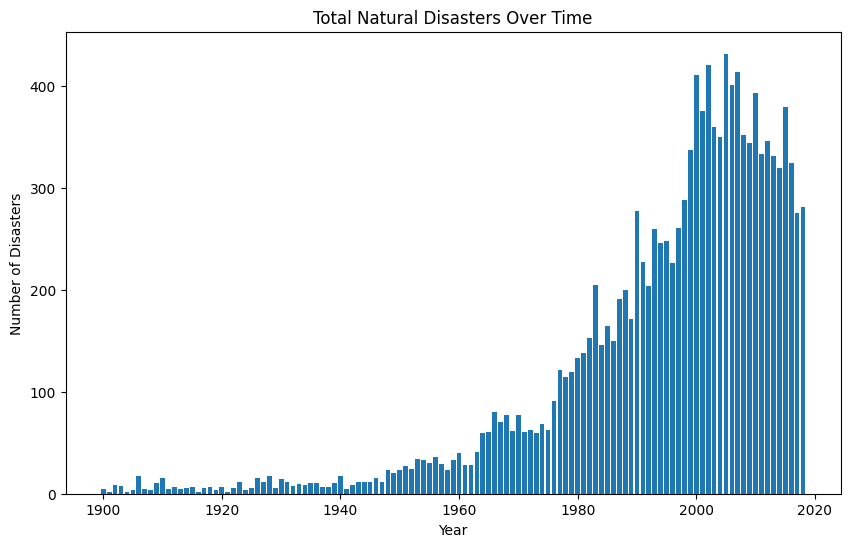

In [4]:
# Filter total natural disasters
total_disasters = df[df['Entity'] == 'All natural disasters']

plt.figure(figsize=(10, 6))
plt.bar(total_disasters['Year'],
        total_disasters['Number of reported natural disasters (reported disasters)'])

plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Total Natural Disasters Over Time')
plt.show()

# **Pie Chart - Distribution of Disaster Types**

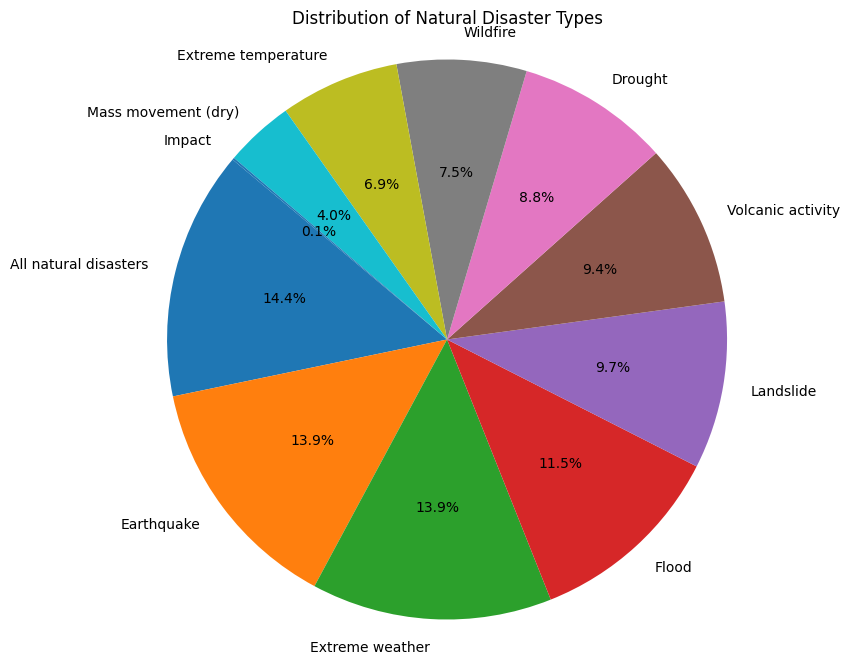

In [5]:
disaster_count = df['Entity'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(disaster_count,
        labels=disaster_count.index,
        autopct='%1.1f%%',
        startangle=140)

plt.axis('equal')
plt.title('Distribution of Natural Disaster Types')
plt.show()

# **Line Trend Analysis Per Disaster Type**

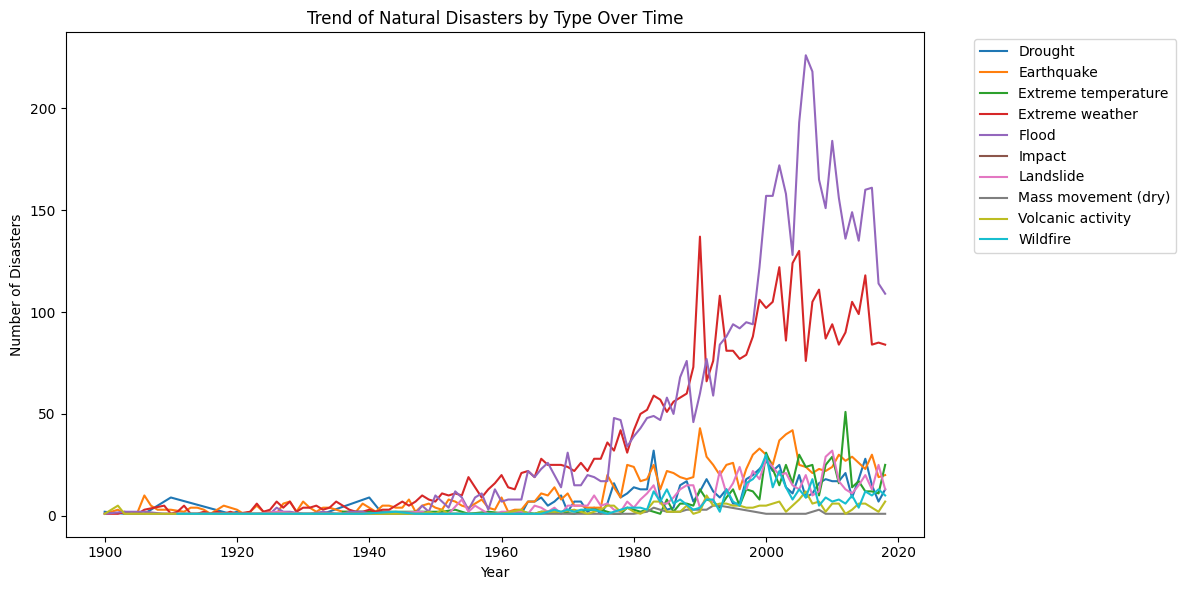

In [6]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df[df['Entity'] != 'All natural disasters'],
             x='Year',
             y='Number of reported natural disasters (reported disasters)',
             hue='Entity')

plt.title('Trend of Natural Disasters by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# **Top 5 Most Frequent Disaster Types (Total Count)**

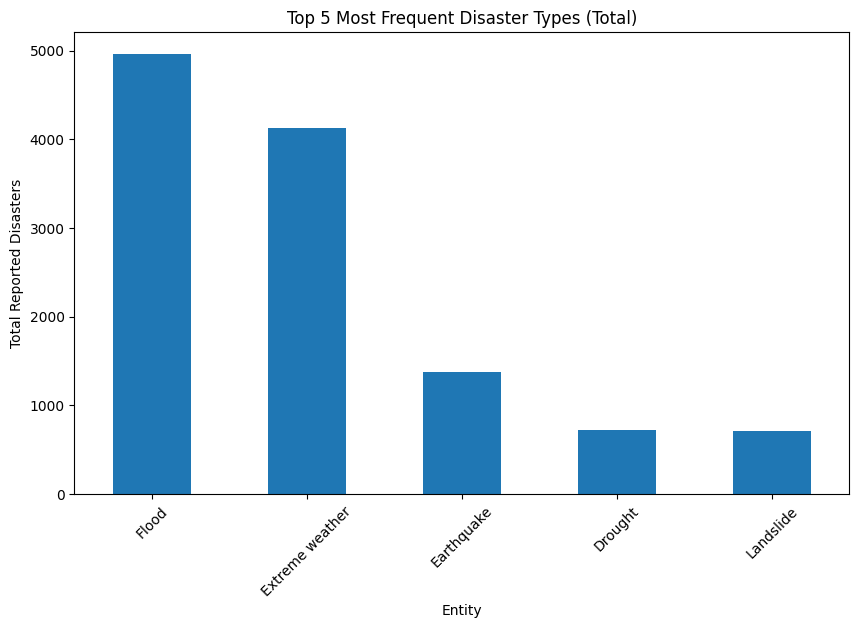

In [7]:
top_disasters = (
    df[df['Entity'] != 'All natural disasters']
    .groupby('Entity')['Number of reported natural disasters (reported disasters)']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 6))
top_disasters.plot(kind='bar')
plt.title('Top 5 Most Frequent Disaster Types (Total)')
plt.ylabel('Total Reported Disasters')
plt.xticks(rotation=45)
plt.show()

# **Growth Rate Analysis**

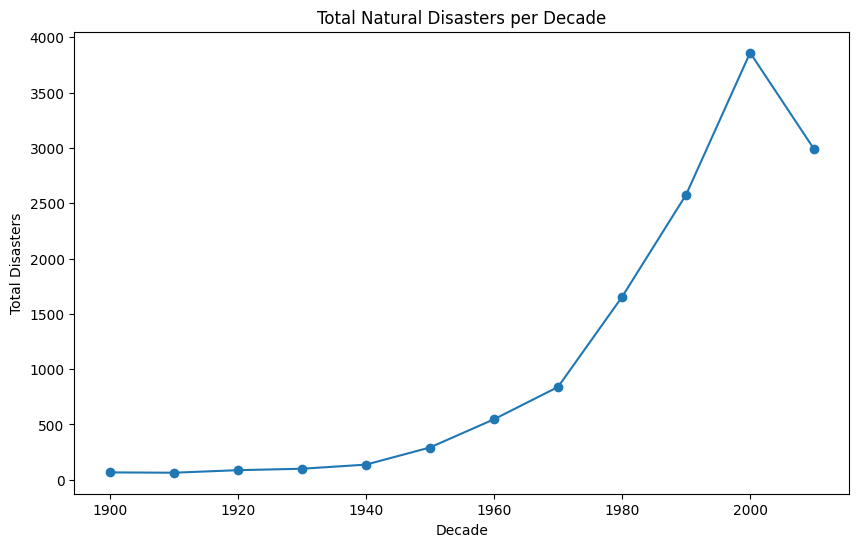

In [8]:
# Create decade column
df['Decade'] = (df['Year'] // 10) * 10

decade_analysis = (
    df[df['Entity'] == 'All natural disasters']
    .groupby('Decade')['Number of reported natural disasters (reported disasters)']
    .sum()
)

plt.figure(figsize=(10, 6))
decade_analysis.plot(marker='o')
plt.title('Total Natural Disasters per Decade')
plt.ylabel('Total Disasters')
plt.show()

# **Total disasters per type**

In [12]:
# Total disasters per type (excluding the aggregated row)
disaster_totals = (
    df[df['Entity'] != 'All natural disasters']
    .groupby('Entity')['Number of reported natural disasters (reported disasters)']
    .sum()
    .sort_values(ascending=False)
)

print("Total Number of Disasters by Type:")
print(disaster_totals)

Total Number of Disasters by Type:
Entity
Flood                  4960
Extreme weather        4129
Earthquake             1372
Drought                 727
Landslide               712
Extreme temperature     575
Wildfire                430
Volcanic activity       249
Mass movement (dry)      57
Impact                    1
Name: Number of reported natural disasters (reported disasters), dtype: int64
